<a href="https://colab.research.google.com/github/naveenvarma600/RAIN-PREDICTION/blob/main/rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [ ]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

LOADING DATASET

In [ ]:
x=pd.read_csv("weather.csv")


UNDERSTANDING DATA SET

In [ ]:
x.info()
x.head()
x.describe()
x.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    366 non-null    object 
 6   WindGustSpeed  366 non-null    int64  
 7   WindDir9am     366 non-null    object 
 8   WindDir3pm     366 non-null    object 
 9   WindSpeed9am   366 non-null    int64  
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [ ]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30,SW,NW,6,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39,E,W,4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50,SSE,ESE,20,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76,SSE,NW,7,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48,NNW,NNW,2,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43,ENE,ENE,11,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46,SSW,WNW,6,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [ ]:
x.describe()
x.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.033588,0.219155,0.132616,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.451824,0.107907,-0.210117,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.148777,0.096462,0.222593,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.320101,0.288319,0.070207,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.033588,0.451824,-0.148777,0.320101,1.000000,0.096846,-0.055685,0.071140,-0.498358,-0.759123,0.000508,-0.041331,-0.681418,-0.661968,0.218018,0.470542,-0.381585
WindGustSpeed,0.219155,0.107907,0.096462,0.288319,0.096846,1.000000,0.530220,0.693242,-0.352001,-0.068954,-0.542993,-0.529988,-0.009174,0.052153,0.257088,0.070631,0.251593
WindSpeed9am,0.132616,-0.210117,0.222593,0.070207,-0.055685,0.530220,1.000000,0.471741,-0.274809,0.142666,-0.359703,-0.252286,0.103971,-0.028354,0.069998,-0.229226,0.041161
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.071140,0.693242,0.471741,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.498358,-0.352001,-0.274809,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759123,-0.068954,0.142666,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


In [ ]:
rain_dict={"Yes":1,"No":0}
x["RainToday"]=x["RainToday"].map(rain_dict)
x["RainTomorrow"]=x["RainTomorrow"].map(rain_dict)

In [94]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30,6,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6
1,14.0,26.9,3.6,4.4,9.7,39,4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6
2,13.7,23.4,3.6,5.8,3.3,85,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8
3,13.3,15.5,39.8,7.2,9.1,54,30,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8
4,7.6,16.1,2.8,5.6,10.6,50,20,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0


Assigning predicting(x) and result(y) variables

In [ ]:
#as it becomes complex if we also consider wind direction,so i'm leaving it
y=x["RainTomorrow"]
x.drop(["RainTomorrow","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)

In [ ]:
#as we have already mapped yes with 1 and no with 0,we reconvert it
def get_rain(number):
  if number==1:
    return "yes,there are chances for rain tomorrow"
  else:
    return "Most probably,rain won't fall tomorrow"

In [95]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

LOGISTIC REGRESSION



In [ ]:
from sklearn.linear_model import LogisticRegression
reg_log=LogisticRegression()
reg_log.fit(x_train,y_train)

# predciting the testing data
y_pred=reg_log.predict(x_test)

from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
reg_log_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it rains tomorrow or not
my_pred=reg_log.predict(np.asarray((8,24.3,0,3.4,6.3,30,6,20,68,29,1019.7,1015,7,7,14.4,23.6,0,3.6)).reshape(1,-1))
get_rain(my_pred)

'yes,there are chances for rain tomorrow'

K NEAREST NEIGHGBORS



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_knn.predict(x_test)

from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_knn_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it rains tomorrow or not
my_pred=clf_knn.predict(np.asarray((8,24.3,0,3.4,6.3,30,6,20,68,29,1019.7,1015,7,7,14.4,23.6,0,3.6)).reshape(1,-1))
get_rain(my_pred)

'yes,there are chances for rain tomorrow'

NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_gnb=GaussianNB()
clf_gnb.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_gnb.predict(x_test)

from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_gnb_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it rains tomorrow or not
my_pred=clf_gnb.predict(np.asarray((8,24.3,0,3.4,6.3,30,6,20,68,29,1019.7,1015,7,7,14.4,23.6,0,3.6)).reshape(1,-1))
get_rain(my_pred)

'yes,there are chances for rain tomorrow'

DECISION TREES



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dec=DecisionTreeClassifier()
clf_dec.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_dec.predict(x_test)

from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_dec_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it rains tomorrow or not
my_pred=clf_dec.predict(np.asarray((8,24.3,0,3.4,6.3,30,6,20,68,29,1019.7,1015,7,7,14.4,23.6,0,3.6)).reshape(1,-1))
get_rain(my_pred)

'yes,there are chances for rain tomorrow'

RANDOM FOREST



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_ran=RandomForestClassifier()
clf_ran.fit(x_train,y_train)

# predciting the testing data
y_pred=clf_ran.predict(x_test)

from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_ran_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it rains tomorrow or not
my_pred=clf_ran.predict(np.asarray((8,24.3,0,3.4,6.3,30,6,20,68,29,1019.7,1015,7,7,14.4,23.6,0,3.6)).reshape(1,-1))
get_rain(my_pred)

'yes,there are chances for rain tomorrow'

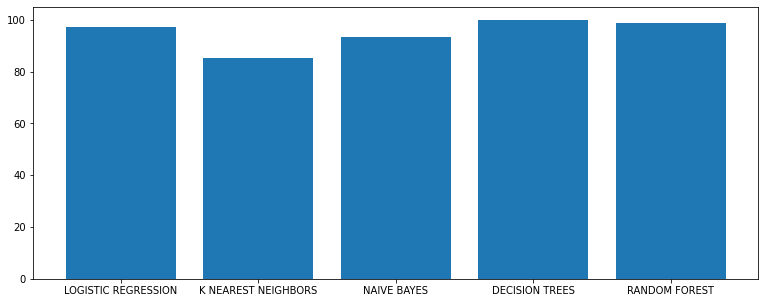

In [ ]:
plt.figure(figsize=(13,5))
models=["LOGISTIC REGRESSION","K NEAREST NEIGHBORS","NAIVE BAYES","DECISION TREES","RANDOM FOREST"]
numbers=[reg_log_score,clf_knn_score,clf_gnb_score,clf_dec_score,clf_ran_score]
plt.bar(models,numbers)
plt.show()

from the above bar graph,we can clearly say that decision trees best suits the problem